In [1]:
import tensorflow.keras as keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt


def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("Index:", index)
        print("Label:", d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

2023-03-07 17:30:57.180694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 17:30:57.180794: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 17:30:58.467153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-07 17:30:58.467797: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-07 17:30:58.467849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
# Loading dataset
dataset = keras.datasets.mnist.load_data()

# Reduce the dataset to 10% 
new_dataset = ((dataset[0][0][:6000], dataset[0][1][:6000]), (dataset[1][0][:1000], dataset[1][1][:1000]))

#Balancing the dataset for training and testing
train_images, train_labels = [], []
for label in range(10):
    label_indices = np.where(new_dataset[0][1] == label)[0]
    random_indices = np.random.choice(label_indices, size=600)
    train_images.append(new_dataset[0][0][random_indices])
    train_labels.append(new_dataset[0][1][random_indices])
train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)
balanced_train_dataset = (train_images, train_labels)

val_images, val_labels = [], []
for label in range(10):
    label_indices = np.where(new_dataset[1][1] == label)[0] 
    random_indices = np.random.choice(label_indices, size=100) 
    val_images.append(new_dataset[1][0][random_indices]) 
    val_labels.append(new_dataset[1][1][random_indices])
    
val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)
balanced_val_dataset = (val_images, val_labels)

There are 60000 images in the original training dataset
There are 10000 images in the original validation dataset
___________________


There are 6000 images in the balanced training dataset
There are 1000 images in the balanced validation dataset
___________________


Randomly printing 10 images with labels from the balanced training dataset
Index: 2011
Label: 3


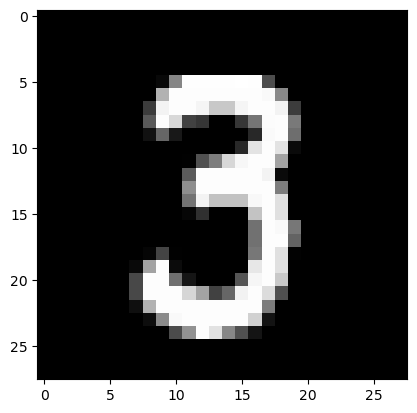

Index: 1517
Label: 2


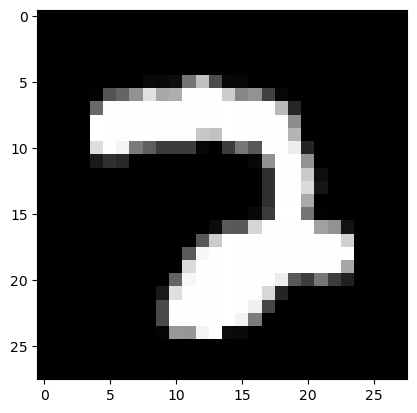

Index: 5513
Label: 9


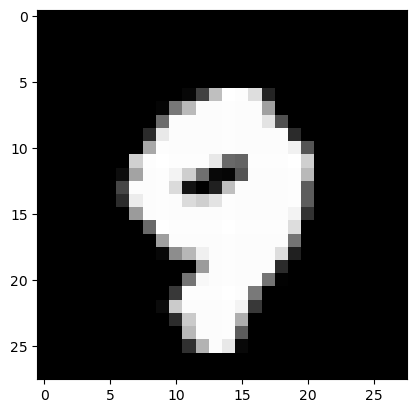

Index: 1379
Label: 2


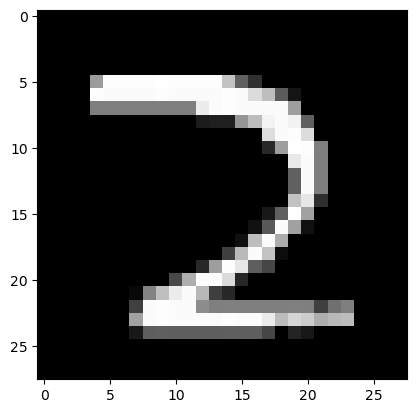

Index: 2725
Label: 4


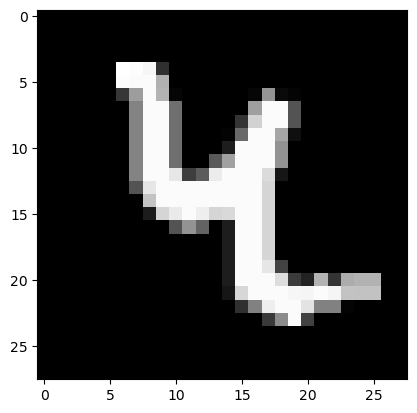

Index: 4658
Label: 7


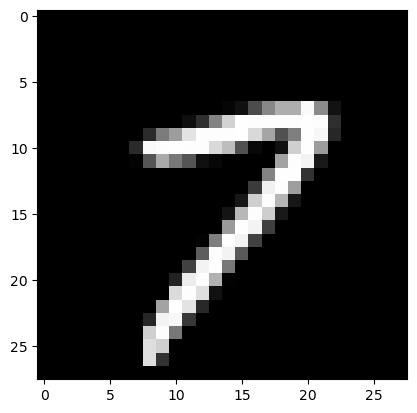

Index: 2851
Label: 4


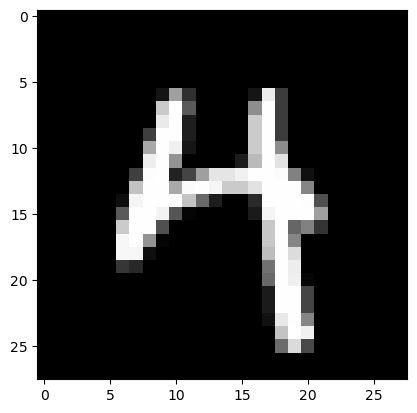

Index: 4961
Label: 8


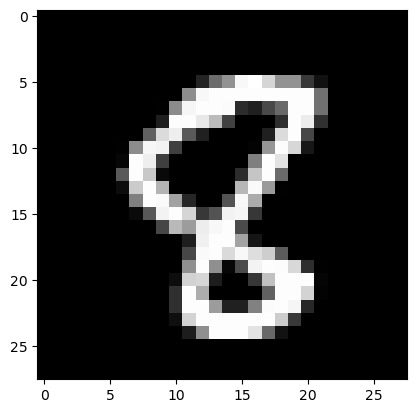

Index: 442
Label: 0


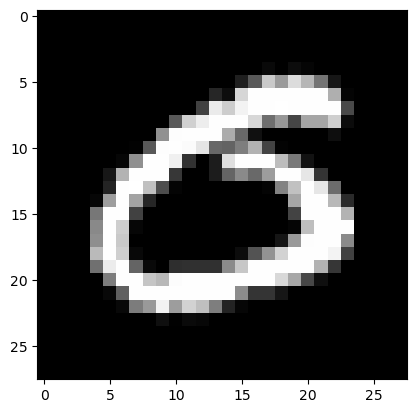

Index: 1122
Label: 1


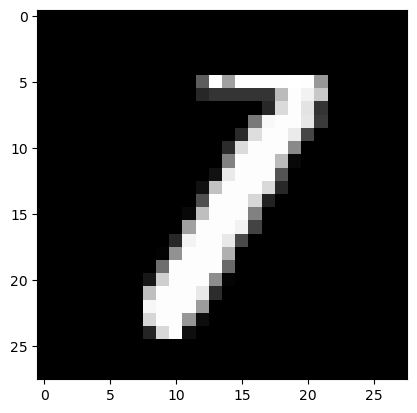

___________________


Randomly printing 10 images with labels from the balanced validation dataset
Index: 996
Label: 9


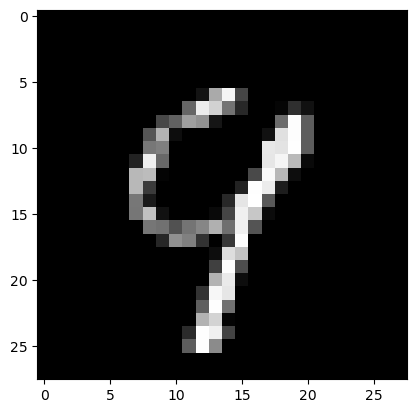

Index: 79
Label: 0


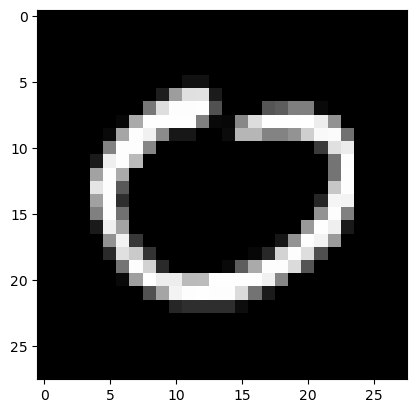

Index: 615
Label: 6


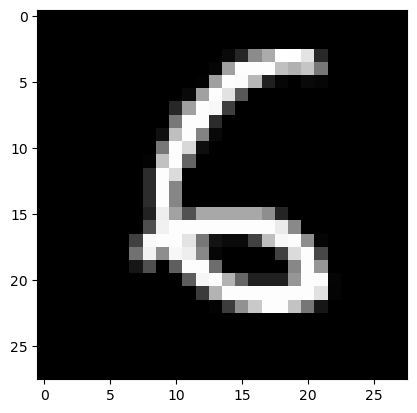

Index: 411
Label: 4


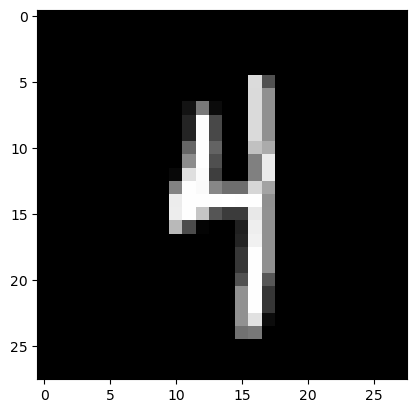

Index: 192
Label: 1


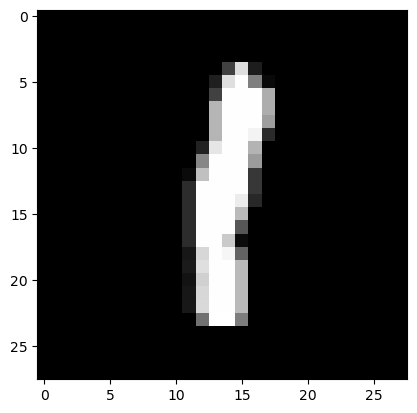

Index: 708
Label: 7


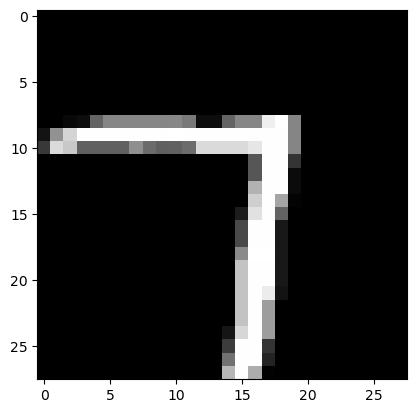

Index: 629
Label: 6


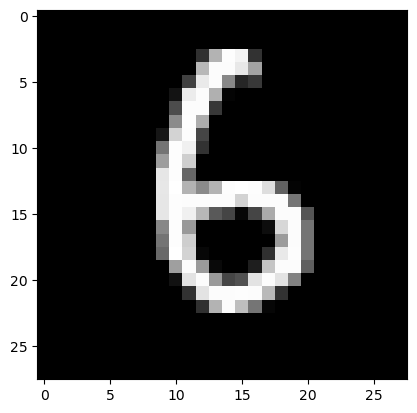

Index: 887
Label: 8


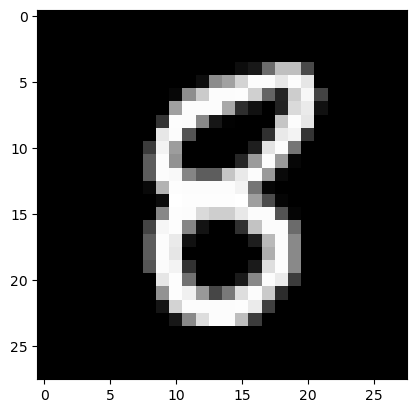

Index: 101
Label: 1


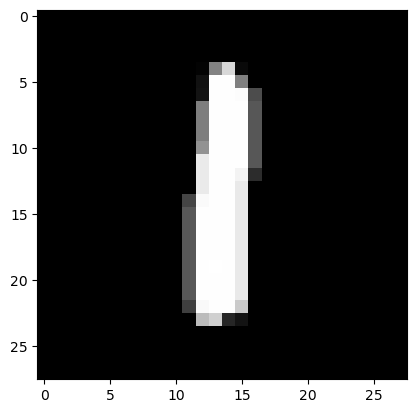

Index: 851
Label: 8


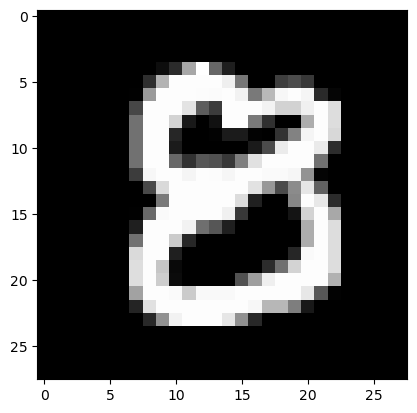

___________________


Breakdown of each label in the balanced training dataset is below (format: dict key is label, dict value is number of images for that label)
Counter({0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600})


Breakdown of each label in the balanced validation dataset is below (format: dict key is label, dict value is number of images for that label)
Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100})


In [3]:
print("There are", len(dataset[0][0]), "images in the original training dataset")
print("There are", len(dataset[1][0]), "images in the original validation dataset")
print("___________________\n\n")

print("There are", len(balanced_train_dataset[0]), "images in the balanced training dataset")
print("There are", len(balanced_val_dataset[0]), "images in the balanced validation dataset")
print("___________________\n\n")

print("Randomly printing 10 images with labels from the balanced training dataset")
display_random_images_with_labels(balanced_train_dataset)
print("___________________\n\n")
print("Randomly printing 10 images with labels from the balanced validation dataset")
display_random_images_with_labels(balanced_val_dataset)
print("___________________\n\n")

train_labels_counter = collections.Counter(balanced_train_dataset[1])
val_labels_counter = collections.Counter(balanced_val_dataset[1])

print("Breakdown of each label in the balanced training dataset is below (format: dict key is label, dict value is number of images for that label)")
print(train_labels_counter)
print("\n")

print("Breakdown of each label in the balanced validation dataset is below (format: dict key is label, dict value is number of images for that label)")
print(val_labels_counter)
